In [223]:
from google.colab import files
uploaded = files.upload()

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [225]:
df = pd.read_csv('hotel_bookings.csv')

#Phase 1

## 1. Missing Values

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [227]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


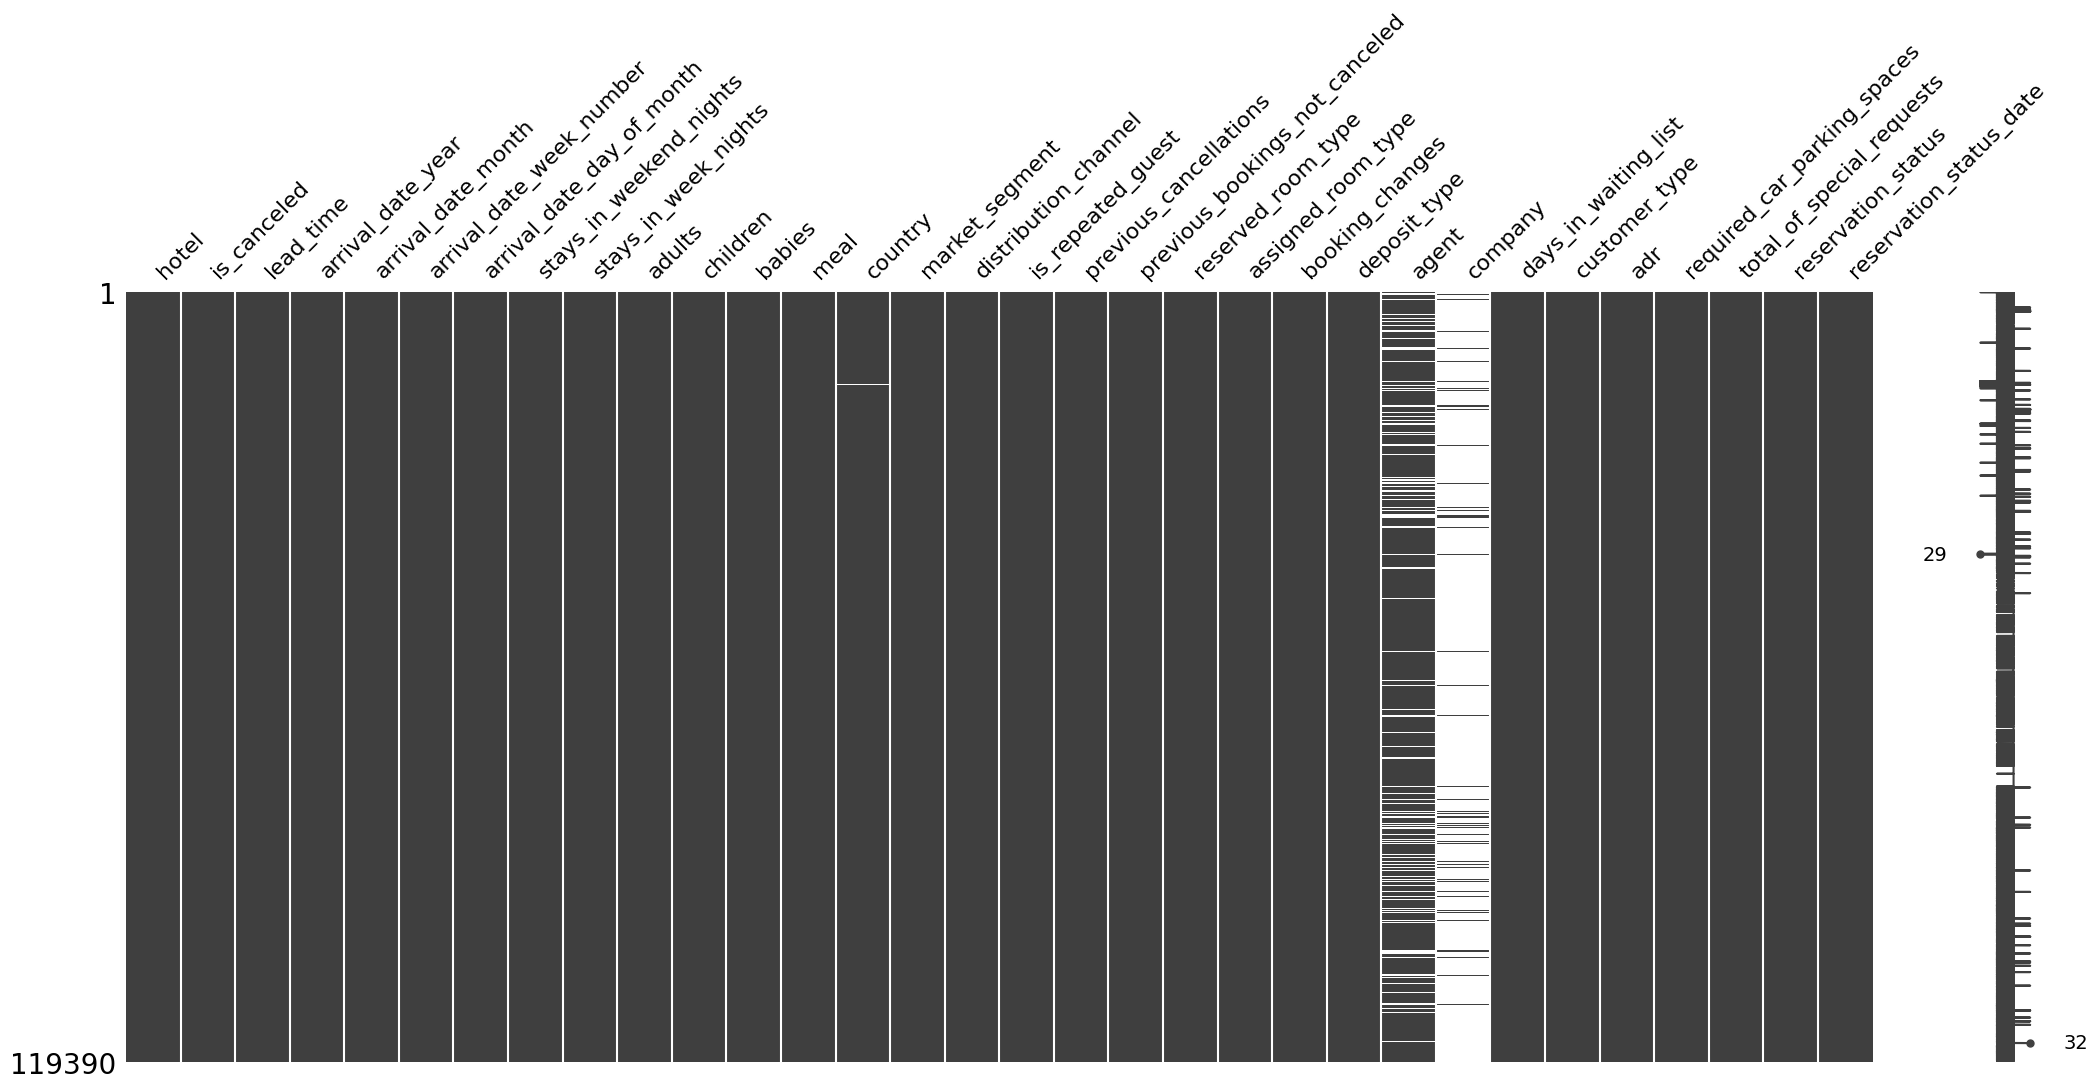

In [228]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()


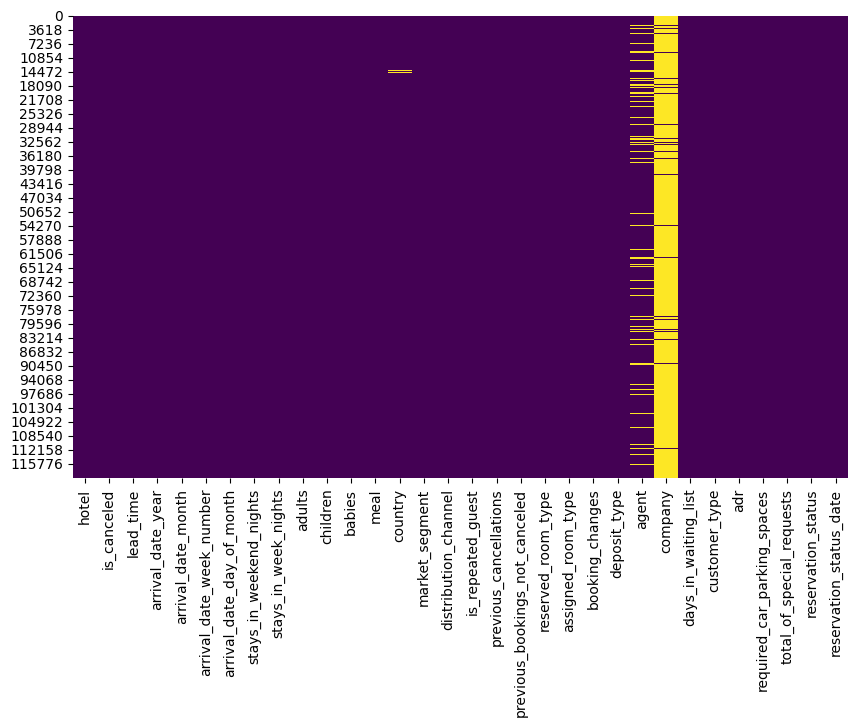

In [229]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


## 2. Outlier Detection

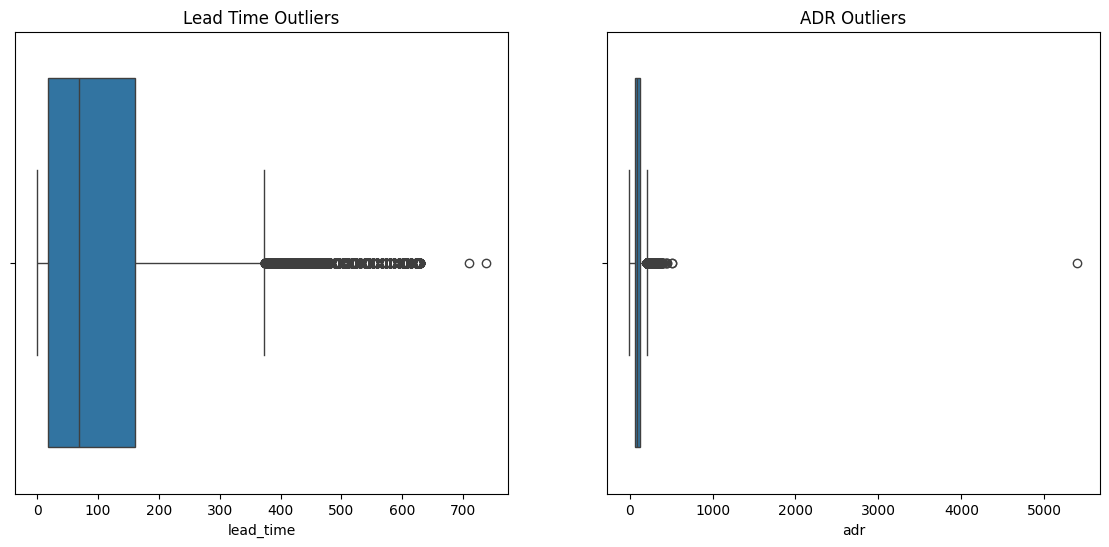

In [230]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x=df['lead_time'], ax=axes[0])
axes[0].set_title("Lead Time Outliers")

sns.boxplot(x=df['adr'], ax=axes[1])
axes[1].set_title("ADR Outliers")

plt.show()


In [231]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

outliers_lead_time = detect_outliers_iqr(df['lead_time'])
outliers_adr = detect_outliers_iqr(df['adr'])

print(f"Lead time outliers: {len(outliers_lead_time)}")
print(f"ADR outliers: {len(outliers_adr)}")


Lead time outliers: 3005
ADR outliers: 3793


## 3. Main Data Quality Issues

Missing data:

  - company and agent have significant missing values.

  - country and children have few missing values.

Outliers:

  - adr contains negative and abnormally high values.

  - lead_time and stay_nights contain extreme but possibly valid long-tail distributions.

Data consistency:

  - Some rows with adults=0 and children/babies > 0 (invalid bookings).

  - adr negative values are invalid.

# Phase 2

## 1. Handle Missing Values

In [232]:
df = df.drop('company', axis=1)
df['agent'] = df['agent'].fillna(0).astype(int)

In [233]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [234]:
df['children'] = df['children'].fillna(df['children'].median())

## 2. Remove Duplicates

In [235]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 32020
Duplicates after: 0


## 3. Handle Outliers

In [236]:
df = df[df['adr'] >= 0]
df['adr'] = df['adr'].clip(upper=1000)

In [237]:
df['lead_time'] = df['lead_time'].clip(upper=365)

In [238]:
df['stays_in_week_nights'] = df['stays_in_week_nights'].clip(upper=30)
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].clip(upper=30)

In [239]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

## 4. Fix Data Types

In [240]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [241]:
df['children'] = df['children'].astype(int)

## Check

In [242]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87203 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87203 non-null  object        
 1   is_canceled                     87203 non-null  int64         
 2   lead_time                       87203 non-null  int64         
 3   arrival_date_year               87203 non-null  int64         
 4   arrival_date_month              87203 non-null  object        
 5   arrival_date_week_number        87203 non-null  int64         
 6   arrival_date_day_of_month       87203 non-null  int64         
 7   stays_in_weekend_nights         87203 non-null  int64         
 8   stays_in_week_nights            87203 non-null  int64         
 9   adults                          87203 non-null  int64         
 10  children                        87203 non-null  int64         
 11  babies

In [243]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203.000000,87203
mean,0.275312,79.538823,2016.210337,26.836485,15.815775,1.004759,2.623591,1.879522,0.138940,0.010848,0.038565,0.030412,0.184088,0.268546,81.093632,0.746522,106.478630,0.084332,0.699013,2016-08-31 02:54:42.575140864
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.250000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,365.000000,2017.000000,53.000000,31.000000,19.000000,30.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,1000.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446674,84.231135,0.686076,13.667803,8.835215,1.027416,2.028322,0.621698,0.456329,0.113721,0.192557,0.369401,1.733288,0.710700,109.971845,10.002540,51.958431,0.281698,0.832053,NaN


# Phase 3

## 1. Create New Features

In [244]:
# Total guests (adults + children + babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Total nights (weekend + week nights)
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Is Family flag
df['is_family'] = np.where((df['children'] + df['babies']) > 0, 1, 0)


## 2. Encode Categorical Variables

In [245]:
low_card_cols = ['meal', 'market_segment']
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [246]:
# Step 1: Compute frequencies
country_counts = df['country'].value_counts(normalize=True)
rare_countries = country_counts[country_counts < 0.01].index
df['country'] = df['country'].replace(rare_countries, 'Other')

In [247]:
# Encode categorical data
label_encoders = {}
for col in ["hotel", "deposit_type", "customer_type", "reservation_status","arrival_date_month", "country", "distribution_channel",
            "reserved_room_type", "assigned_room_type", "reservation_status_date"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,1,0,342,2015,5,27,1,0,0,2,...,False,False,False,False,False,True,False,False,False,False
1,1,0,365,2015,5,27,1,0,0,2,...,False,False,False,False,False,True,False,False,False,False
2,1,0,7,2015,5,27,1,0,1,1,...,False,False,False,False,False,True,False,False,False,False
3,1,0,13,2015,5,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
4,1,0,14,2015,5,27,1,0,2,2,...,False,False,False,False,False,False,False,False,True,False


## 4. Final Preparation: Train-Test Split

In [248]:
from sklearn.model_selection import train_test_split

# Define target & features
X = df.drop(columns=['is_canceled'])  # Features
y = df['is_canceled']                 # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (69762, 42)
Test shape: (17441, 42)


In [249]:
#training
lr = LogisticRegression()
#training the mode1
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [250]:
#pridect the target
y_pred =lr.predict(X_test)

In [251]:
#evaluation
acc =accuracy_score(y_test,y_pred)
print(f"accuracy: {acc:.2f}")     #✔✔✔✔

accuracy: 0.87
